In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

curr = Path.cwd() 
path = curr.parent.parent
file = str(path)
file+="/data_cleanup/cleaned_data.csv"
print(file)

/home/matijak/Documents/programiranje/lumen/data_cleanup/cleaned_data.csv


In [2]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [3]:
df = df[df["status_rezervacije"] == "Check-Out"]
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaT,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaT,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaT,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [4]:
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']
occupancy = df[(df['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])
#print(occupancy)

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

,datum,broj_gostiju
0,2015-01-01,10.0
1,2015-01-02,16.0
2,2015-01-03,19.0
3,2015-01-04,24.0
4,2015-01-05,25.0


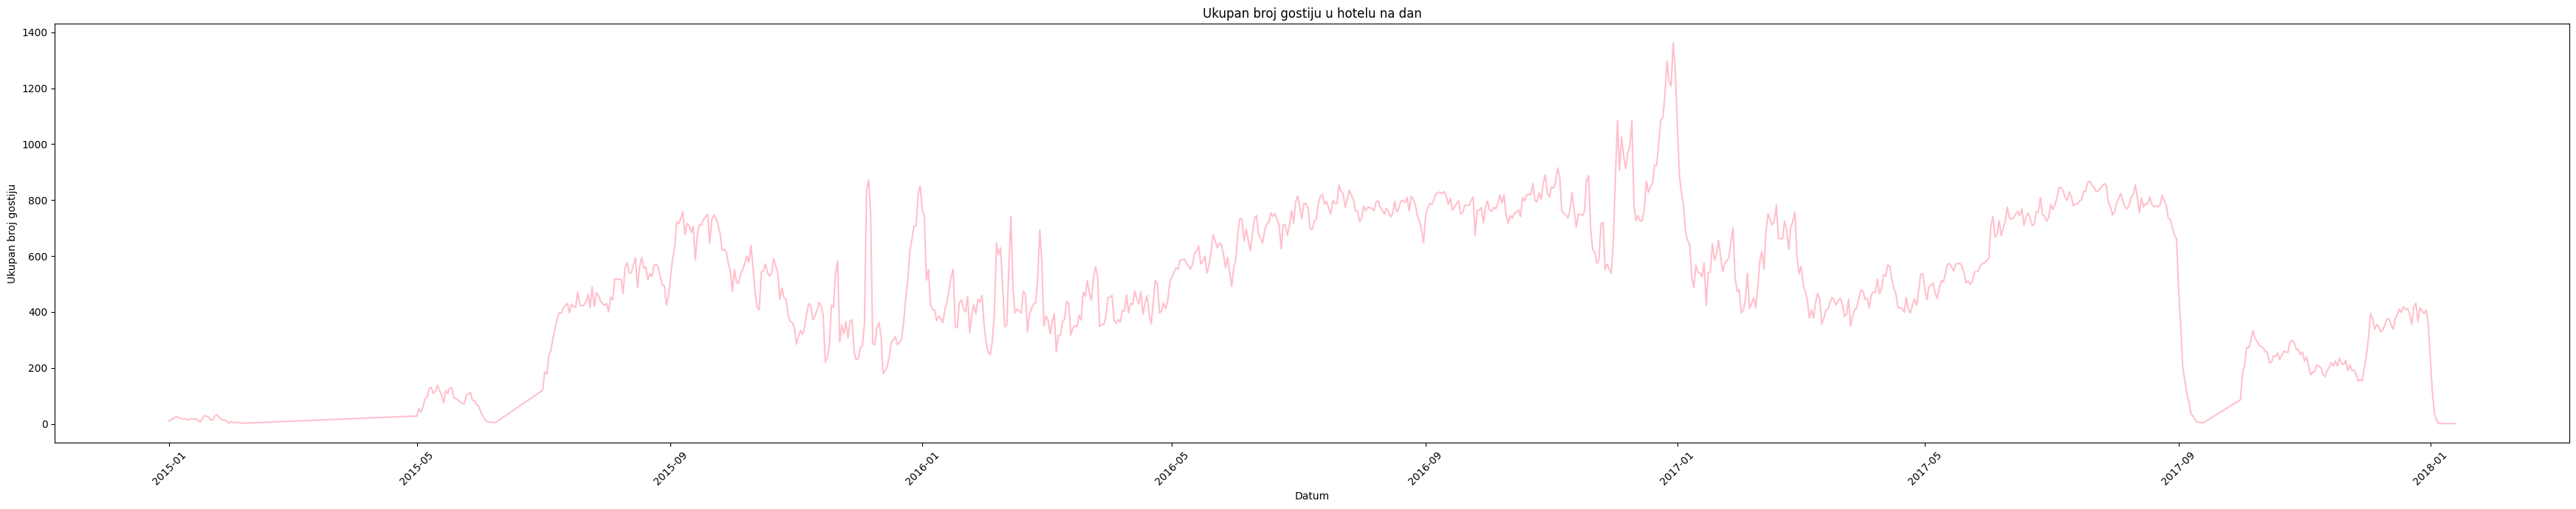

In [5]:
plt.figure(figsize=(35, 7))  # Prilagodite veličinu prema potrebi
plt.plot(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

                datum  broj_gostiju
datum                              
2015-08-30 2015-08-30         425.0
2015-08-31 2015-08-31         457.0
2015-09-01 2015-09-01         523.0
2015-09-02 2015-09-02         590.0
2015-09-03 2015-09-03         629.0


Text(0.5, 1.0, 'DF2')

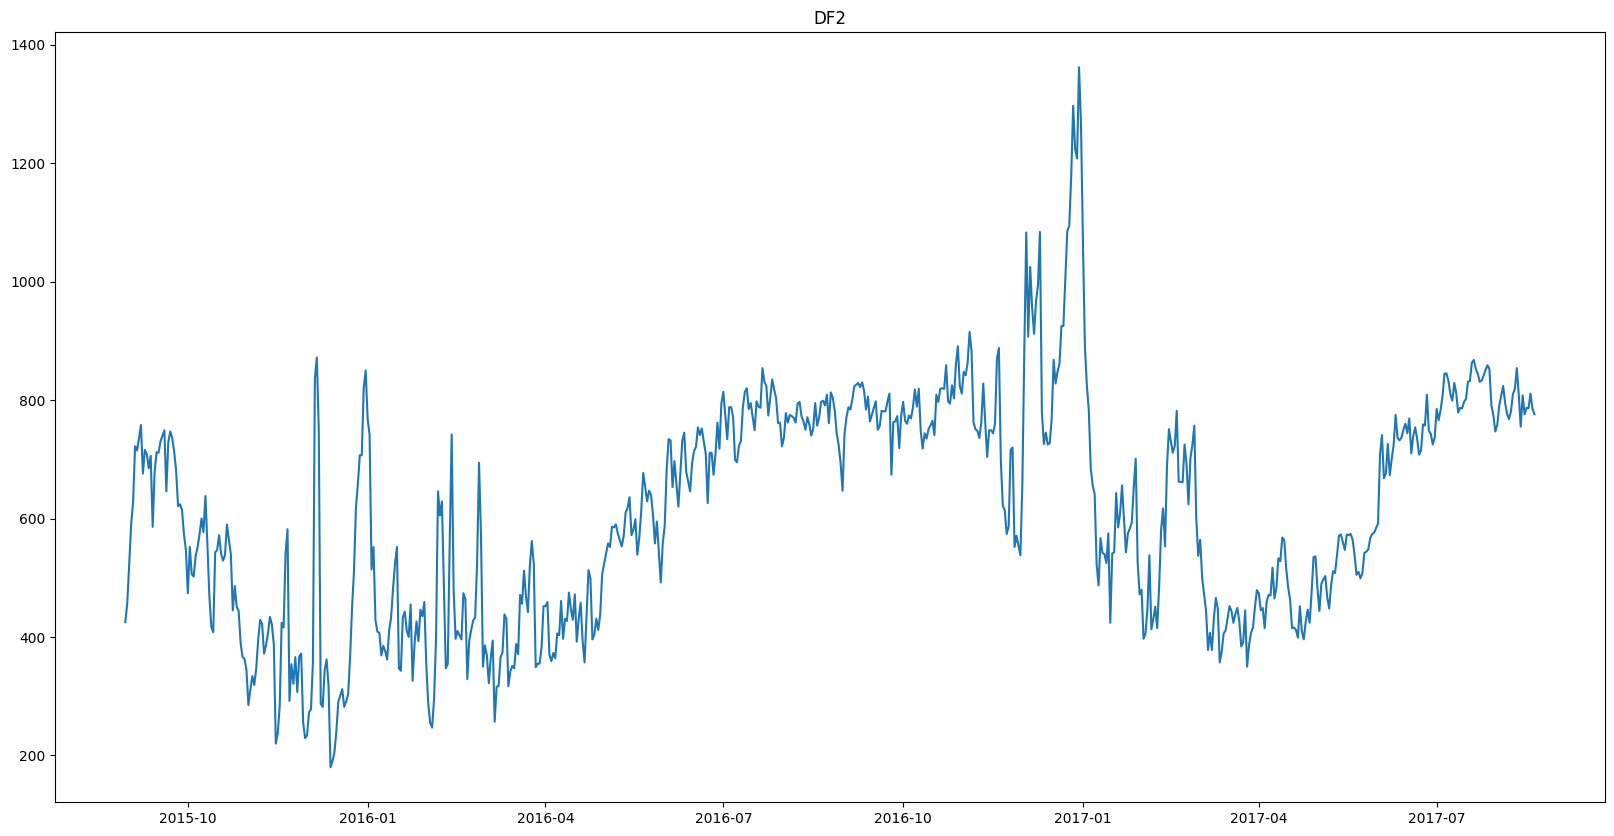

In [6]:
df2 = final_df[(final_df["datum"] >= datetime(2015,8,30)) &  (final_df["datum"] <= datetime(2017,8,20))]
df2.index = df2["datum"]
print(df2.head())
plt.figure(figsize = (20,10))
plt.plot(df2["datum"], df2["broj_gostiju"])
plt.title("DF2")

In [7]:
df2.drop(columns=['datum'], inplace=True)
df2.head()

/tmp/ipykernel_33973/2887233719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['datum'], inplace=True)


,broj_gostiju
datum,
2015-08-30,425.0
2015-08-31,457.0
2015-09-01,523.0
2015-09-02,590.0
2015-09-03,629.0


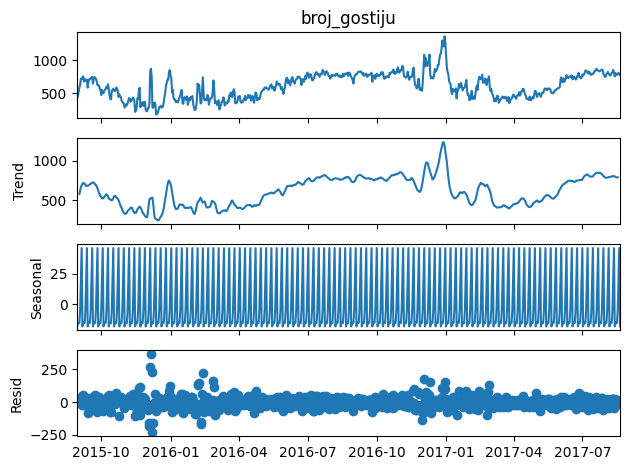

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
results= seasonal_decompose(df2['broj_gostiju'])
results.plot();

In [26]:
train = df2.iloc[:-50]
test = df2.iloc[-50:]
train.shape,test.shape

((672, 1), (50, 1))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[:10]

array([[0.2072758 ],
       [0.23434856],
       [0.29018613],
       [0.34686971],
       [0.37986464],
       [0.45854484],
       [0.45262267],
       [0.46954315],
       [0.48900169],
       [0.41962775]])

In [38]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 370
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.2072758  0.23434856 0.29018613 0.34686971 0.37986464 0.45854484
 0.45262267 0.46954315 0.48900169 0.41962775 0.4534687  0.44754653
 0.42724196 0.44500846 0.34348562 0.4213198  0.4500846  0.44923858
 0.46531303 0.47377327 0.48138748 0.39424704 0.46446701 0.47969543
 0.47038917 0.45093063 0.42385787 0.37309645 0.37563452 0.3680203
 0.33333333 0.31049069 0.24873096 0.31472081 0.27580372 0.27241963
 0.30203046 0.31472081 0.33333333 0.35532995 0.3358714  0.38747885
 0.31895093 0.24534687 0.20050761 0.1928934  0.3071066  0.31049069
 0.33164129 0.30541455 0.29526227 0.30287648 0.34686971 0.3248731
 0.30456853 0.22419628 0.25888325 0.22927242 0.22335025 0.17766497
 0.15736041 0.15482234 0.13874788 0.08883249 0.1108291  0.13028765
 0.11759729 0.14128596 0.18274112 0.2106599  0.20473773 0.16243655
 0.17428088 0.19120135 0.21489002 0.20389171 0.1751269  0.03384095
 0.04822335 0.08714044 0.20642978 0.19966159 0.30541455 0.34010152
 0.09475465 0.14720812 0.11928934 0.15736041 0

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(500, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 500)            │     1,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,004,501 (3.83 MB)

 Trainable params: 1,004,501 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=50)

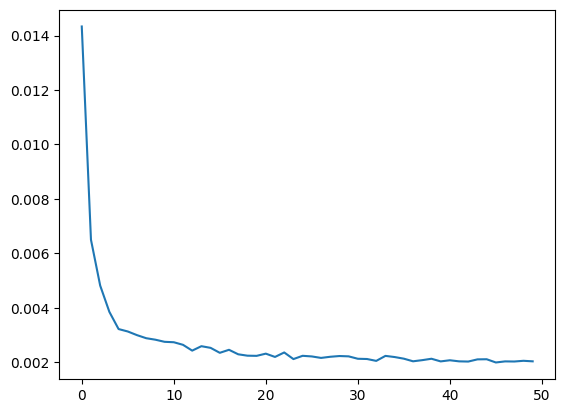

In [31]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [33]:
last_train_batch = scaled_train[-200:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[0.5192535]], dtype=float32)

In [34]:
scaled_test[0]

array([0.49576988])

In [35]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [36]:
test_predictions

[array([0.5192535], dtype=float32),
 array([0.5224474], dtype=float32),
 array([0.5317735], dtype=float32),
 array([0.5433638], dtype=float32),
 array([0.556888], dtype=float32),
 array([0.5725026], dtype=float32),
 array([0.59017307], dtype=float32),
 array([0.60954726], dtype=float32),
 array([0.6303971], dtype=float32),
 array([0.6520962], dtype=float32),
 array([0.6738476], dtype=float32),
 array([0.6949959], dtype=float32),
 array([0.71484226], dtype=float32),
 array([0.7326255], dtype=float32),
 array([0.7475394], dtype=float32),
 array([0.75878656], dtype=float32),
 array([0.7656609], dtype=float32),
 array([0.76765746], dtype=float32),
 array([0.7645907], dtype=float32),
 array([0.75669426], dtype=float32),
 array([0.74466914], dtype=float32),
 array([0.7296493], dtype=float32),
 array([0.713078], dtype=float32),
 array([0.69651407], dtype=float32),
 array([0.6814208], dtype=float32),
 array([0.668991], dtype=float32),
 array([0.6600465], dtype=float32),
 array([0.65501684], dt

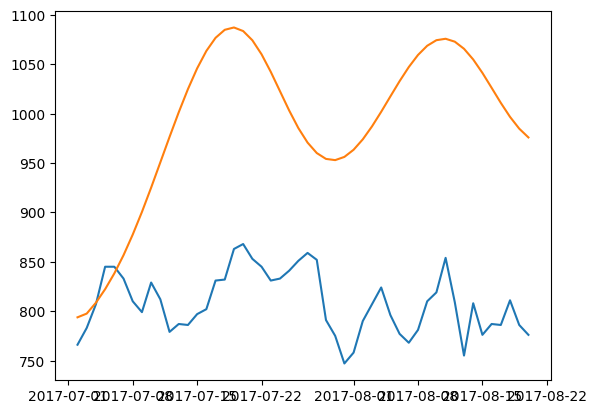

In [37]:
true_predictions = scaler.inverse_transform(test_predictions)
plt.plot(test.index, test["broj_gostiju"])
plt.plot(test.index, true_predictions)